<a href="https://colab.research.google.com/github/dhanajustbegining/AI-Learning/blob/main/CNN_architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing needed libraries
import numpy as np
import matplotlib.pyplot as plt
#neural network -tensorflow
#ML -sklearn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import mnist #loading mist dataset
from tensorflow.keras.utils import to_categorical #convert to 0's and 1's integer labels to vector using one hot encoding

np.random.seed(42) #default value is 42
tf.random.set_seed(42)



In [ ]:
#load the MNIST data set
""" 700 people . 0 -9 numbers.
What MNIST Is
MNIST stands for Modified National Institute of Standards and Technology database.
It’s one of the most famous datasets in machine learning, especially for image classification.

Purpose: Train and test models that recognize handwritten digits (0–9).

Format:

Images: 28×28 pixels, grayscale

Number of images: 70,000 total

60,000 for training

10,000 for testing

Labels: Which digit (0–9) each image represents.
#train test split
#x values ,y labels 0-9
"""
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("training images",x_train.shape,"testing images",x_test.shape)
#print(y_train.shape)
#print(x_test.shape)
#print(y_test.shape)


training images (60000, 28, 28) testing images (10000, 28, 28)


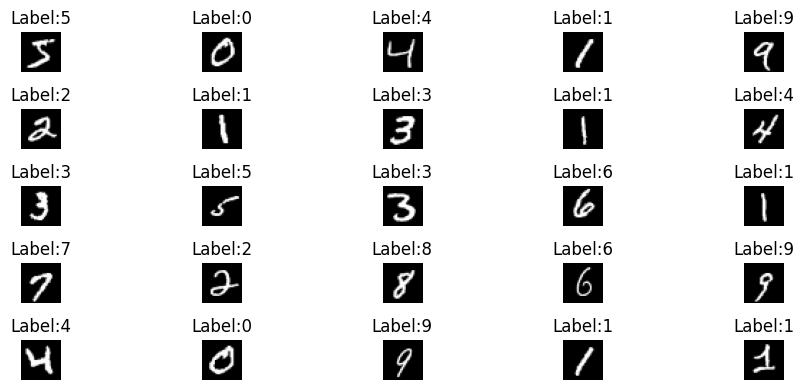

In [ ]:
plt.figure(figsize=(10,4))
#for i in range(6): #number of images in loop
#  plt.subplot(2,3,i+1) #no of rows
for i in range(25): #number of images in loop
  plt.subplot(5,5,i+1) #no of rows and columns
  plt.imshow(x_train[i],cmap='gray') #display in image format
  plt.title(f"Label:{y_train[i]}")
  plt.axis('off')
plt.tight_layout() #avoids overlapping of output
plt.show()



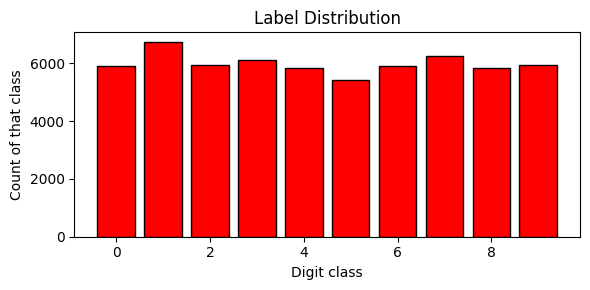

In [ ]:
#0-9 label distribution
count=np.bincount(y_train,minlength=10)
plt.figure(figsize=(6,3))
plt.bar(range(10),count,color='red',edgecolor='black')
plt.title("Label Distribution")
plt.xlabel("Digit class")
plt.ylabel("Count of that class")
plt.tight_layout() # no overlapping
plt.show()
#print(count)

In [ ]:
#pre procesing the images
x_train[1]



array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         54, 227, 253, 252, 239, 233, 252,  57,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,  60,
        224, 252, 253, 252, 202,  84, 252, 253, 122,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 163, 252,
        252, 252, 253, 252, 252,  96, 189, 253, 167,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 238, 253,
        253, 190, 114, 253, 228,  47,  79, 255, 168,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238, 252, 252,
        179,  12,  75, 121,  21,   0,   0, 253, 243,  50,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  38, 165, 253, 233, 208,
         84,   0,   0,   0,   0,   0,   0, 253, 252, 165,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   7, 178, 252, 240,  71,  19,
         28,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  57, 252, 252,  63,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 198, 253, 190,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 255, 253, 196,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  76, 246, 252, 112,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 148,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 230,  25,   0,   0,   0,
          0,   0,   0,   0,   0,   7, 135, 253, 186,  12,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 223,   0,   0,   0,   0,
          0,   0,   0,   0,   7, 131, 252, 225,  71,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 145,   0,   0,   0,   0,
          0,   0,   0,  48, 165, 252, 173,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  86, 253, 225,   0,   0,   0,   0,
          0,   0, 114, 238, 253, 162,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 249, 146,  48,  29,  85,
        178, 225, 253, 223, 167,  56,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 252, 252, 229, 215, 252,
        252, 252, 196, 130,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  28, 199, 252, 252, 253, 252, 252,
        233, 145,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  25, 128, 252, 253, 252, 141,
         37,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
x_train=x_train.astype('float32')/255.0

In [ ]:
x_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
#normalize the image into[0 to 1]
x_train=x_train.astype('float32')/255.0
#x_test=x_test.astype('float32')/255.0

In [ ]:
x_test[25]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          3,  80, 195,  85,  80,  80,  80,  14,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          9, 253, 253, 253, 253, 253, 253, 152,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  11,  62,  56,   0,
          9, 253, 253, 253, 253, 253, 253, 251, 237,  57,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 141, 253, 241,  83,
          4, 161, 253, 253, 253, 253, 253, 253, 253,  60,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  11, 141, 248, 253, 253, 147,
          0,  73, 209, 252, 253, 253, 253, 253, 253, 212,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 147, 253, 253, 253, 253, 199,
         34,   0,   0, 160, 253, 142, 194, 253, 253, 244,  77,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   9, 136, 250, 253, 253, 253, 253, 253,
         69,   0,   0,  15,  52,   5,  27, 201, 253, 253, 156,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  80, 253, 253, 253, 253, 253, 253, 209,
         41,   0,   0,   0,   0,   0,   0,  36, 253, 253, 196,  33,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  86, 253, 253, 253, 253, 253, 234,  41,
          0,   0,   0,   0,   0,   0,   0,  42, 253, 253, 253,  78,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 254, 253, 253, 253, 253, 253, 165,   0,
          0,   0,   0,   0,   0,   0,   0, 211, 253, 253, 253,  78,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 254, 253, 253, 253, 253, 172,  18,   0,
          0,   0,   0,   0,   0,   0,   0, 211, 253, 253, 253,  78,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 254, 253, 253, 253, 210,   4,   0,   0,
          0,   0,   0,   0,  42, 229, 246, 252, 253, 253, 159,   3,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 254, 253, 253, 253, 209,   0,   0,   0,
          0,   0,  99, 149, 210, 253, 253, 253, 253, 242,  65,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 255, 253, 253, 253, 218,  53,  53,  53,
        180, 228, 244, 253, 253, 253, 253, 253, 253,  77,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 163, 253, 253, 253, 253, 253, 253, 253,
        253, 253, 253, 253, 253, 253, 253, 253, 193,  29,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  80, 253, 253, 253, 253, 253, 253, 253,
        253, 253, 253, 253, 253, 253, 234, 193,  24,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  44, 210, 253, 253, 253, 253, 253, 253,
        253, 253, 253, 253, 253, 229,  67,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  38, 228, 253, 253, 253, 253, 253,
        253, 253, 253, 248, 235,  65,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  39, 210, 253, 253, 253, 253,
        253, 253, 189, 114,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  43, 108, 253, 253, 179,
         78,  78,  27,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
#normalization
x_test=x_test.astype('float32')/255.0

In [ ]:
x_test[25]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
x_train[1].shape#image is RGB dimention should look like 28,28,3(channel number) if greyscale image 28,28,1

(28, 28)

In [ ]:
#adding channels
x_train=np.expand_dims(x_train,axis=-1)
#x_test=x_test.np.expand_dims(x_test,-1)

In [ ]:
x_train[1].shape

(28, 28, 1)

In [ ]:
x_test[1].shape

(28, 28)

In [ ]:
x_test=np.expand_dims(x_test,-1)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
#converting to catogetical
y_train_cat=to_categorical(y_train,num_classes=10)


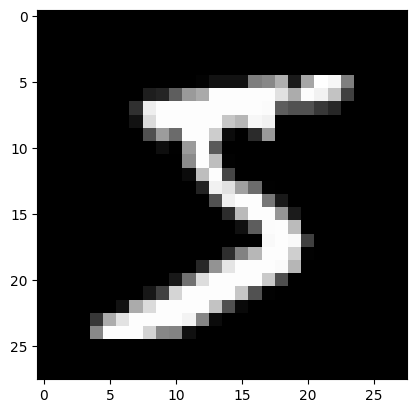

In [ ]:
plt.imshow(x_train[0],cmap='gray')

In [ ]:
y_train[0]

np.uint8(5)

In [ ]:
# y_train=7 #[0,0,0,0,0,0,1,0,0] 7th place is 1

In [ ]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

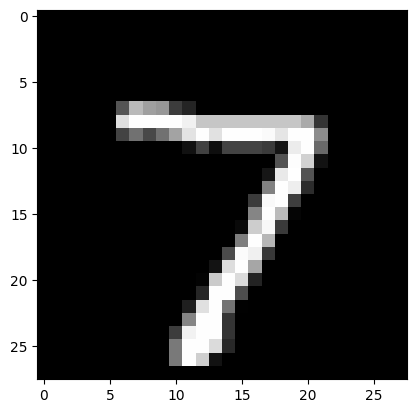

In [ ]:
plt.imshow(x_test[0],cmap='gray')

In [ ]:
y_test_cat=to_categorical(y_test,num_classes=10)

In [ ]:
y_test_cat

In [ ]:
#shapecheck
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train_cat.shape)
print("y_test shape",y_test_cat.shape)

In [ ]:
#define CNN architecture have atleast 3 layers input,hidden and output layer
model=models.Sequential([
    layers.Input(shape=(28,28,1)),
    layers.Conv2D(32,kernel_size=3,activation='relu',padding='same'), #relu checks if the picture is important or not Hidden layer 1
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(64,kernel_size=3,activation='relu',padding='same'), #Hidden layer 2
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),#hidden layer
    layers.Dense(128,activation='relu'), #output layer
    layers.Dense(10,activation='softmax') #0 to 9 so 10 clsses softmax is multi class if binory class we use sigmoid class instead of softmax
])

In [ ]:
#compilation of the model
model.compile(
    optimizer='adam', #adaptive
    loss='categorical_crossentropy',# if image is 7 then probability could be[0.4,0,0,0,0,0,0,0.9,0,0] wil go with highest probability
    metrics=['accuracy']
    )

In [ ]:
#training the model
model_train=model.fit(x_train,y_train_cat,batch_size=128,epochs=5,validation_split=0.1,verbose=1) #epochs 5 means batches of 5 for comples dataset, it should be high
#verbose= 0 is no output  1 will give progressbar 2 no progressbar,but epochs will be displayed

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 55s 126ms/step - accuracy: 0.3047 - loss: 1.9258 - val_accuracy: 0.8877 - val_loss: 0.3857
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 126ms/step - accuracy: 0.8739 - loss: 0.4132 - val_accuracy: 0.9253 - val_loss: 0.2393
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 51s 120ms/step - accuracy: 0.9125 - loss: 0.2842 - val_accuracy: 0.9453 - val_loss: 0.1864
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 119ms/step - accuracy: 0.9324 - loss: 0.2220 - val_accuracy: 0.9570 - val_loss: 0.1530
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 119ms/step - accuracy: 0.9436 - loss: 0.1821 - val_accuracy: 0.9632 - val_loss: 0.1294


In [ ]:
#testing
test_loss,test_acc=model.evaluate(x_test,y_test_cat,verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8217 - loss: 81.3045


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


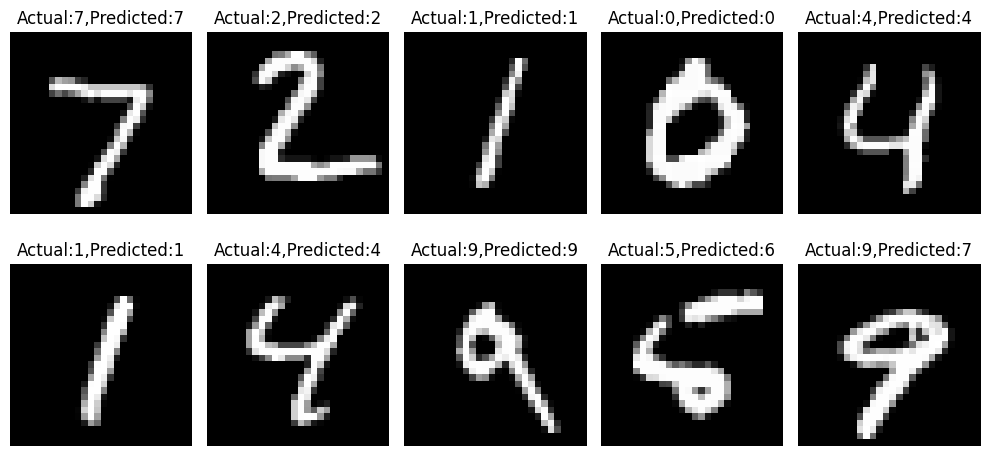

In [ ]:
pred_prob=model.predict(x_test)
pred_classes=np.argmax(pred_prob,axis=1)
plt.figure(figsize=(10,5))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(x_test[i].squeeze(),cmap='gray')
  plt.title(f"Actual:{y_test[i]},Predicted:{pred_classes[i]}")
  plt.axis('off')
plt.tight_layout()
plt.show()